In [ ]:
# Librerias

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

Una vez descargados los archivos deseados desde la base de datos de imagenes satelitales (https://data.jrc.ec.europa.eu/dataset/f28ba8b9-049f-4ad4-87ef-012ba21c6d54) podemos iniciar la extracción de la información.

Primero exploramos los archivos para ver su contenido.

In [26]:
# Ruta al archivo .nc.
archivo_nc = 'ruta a GMIS_A_CHLA_01_2003.nc'

# Abrir el archivo.
archivo = Dataset(archivo_nc, 'r')

# Acceder a las variables y atributos.
for variable in archivo.variables:
    print(variable)

lon
lat
Chl_a


In [27]:
# Acceder las coordenadas y ver su contenido.
datos = archivo.variables['lat']

# Leer los valores de los datos
valores = datos[:]
print(valores)

# Cerrar el archivo
archivo.close()


[ 89.958336  89.875     89.79167  ... -89.791664 -89.87501  -89.958336]


Visualizar las capas de inormación satelital.

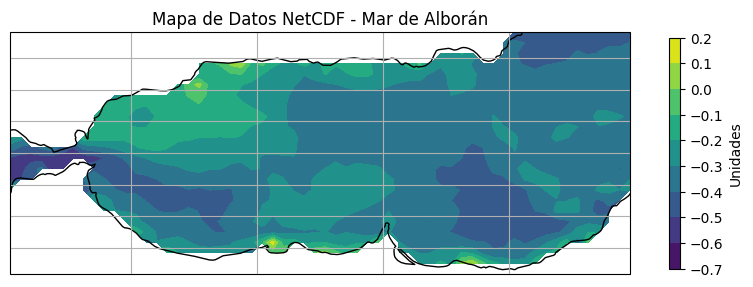

In [28]:

# Ruta al archivo .nc.
archivo_nc = 'ruta a GMIS_A_CHLA_02_2003.nc'

# Abrir el archivo.
archivo = Dataset(archivo_nc, 'r')

# Obtener variables de latitud, longitud y datos.
latitudes = archivo.variables['lat'][:]
longitudes = archivo.variables['lon'][:]
datos = archivo.variables['Chl_a'][:]

# Definir las coordenadas del Mar de Alborán.
lat_min, lat_max = 35, 37
lon_min, lon_max = -6, -1

# Encontrar índices de las coordenadas del Mar de Alborán.
lat_inicio = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[0][0]
lat_fin = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[-1][-1]
lon_inicio = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[0][0]
lon_fin = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[-1][-1]


# Filtrar los datos para que solo incluyan el Mar de Alborán.
latitudes_mar_alboran = latitudes[lat_inicio:lat_fin + 1]
longitudes_mar_alboran = longitudes[lon_inicio:lon_fin + 1]
datos_mar_alboran = datos[lat_inicio:lat_fin + 1, lon_inicio:lon_fin + 1]

# Cerrar el archivo.
archivo.close()

# Crear la figura y el eje del mapa.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Agregar datos al mapa.
imagen = ax.contourf(longitudes_mar_alboran, latitudes_mar_alboran, datos_mar_alboran, transform=ccrs.PlateCarree())

# Agregar barra de color.
barra_color = plt.colorbar(imagen, ax=ax, shrink=0.5, orientation='vertical')
barra_color.set_label('Unidades')

# Agregar detalles al mapa.
ax.coastlines()
ax.gridlines()

# Título y etiquetas.
plt.title('Mapa de Datos NetCDF - Mar de Alborán')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa.
plt.show()
